In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Diabetes Level

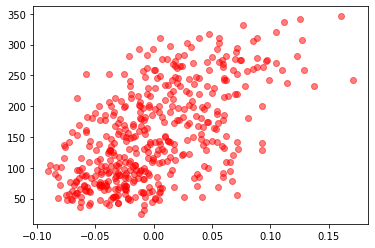

In [26]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
plt.plot(diabetes_X,diabetes_y,'ro',alpha=0.5)

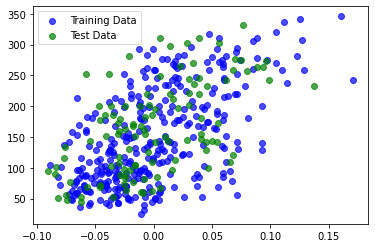

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X,diabetes_y)
plt.scatter(X_train,Y_train,label='Training Data',color='b',alpha=0.7)
plt.scatter(X_test,Y_test,label='Test Data',color='g',alpha=0.7)
plt.legend()
plt.show()

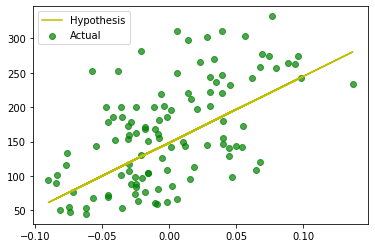

In [27]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)

plt.plot(X_test,predictions,label='Hypothesis',color='y')
plt.scatter(X_test,Y_test,label='Actual',color='g',alpha=0.7)
plt.legend()
plt.show()

In [22]:
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test,predictions))
print("Coefficient of determination: %.2f" % r2_score(Y_test,predictions))

Coefficients: 
 [893.69757025]
Mean squared error: 3875.45
Coefficient of determination: 0.38


Surviving Titanic

In [63]:
from pydataset import data
import seaborn as sns

titanic = data('titanic')
titanic.sample(5)

,class,age,sex,survived
753,3rd class,adults,man,no
81,1st class,adults,man,no
41,1st class,adults,man,yes
1249,3rd class,child,man,yes
357,2nd class,adults,man,no


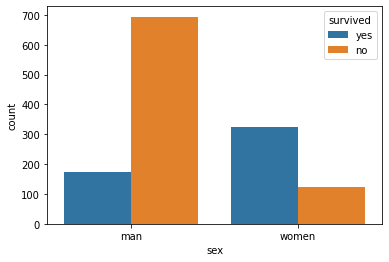

In [66]:
sns.countplot(x='sex',hue='survived',data=titanic)

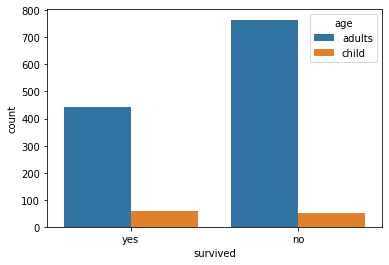

In [67]:
sns.countplot(x='survived',hue='age',data=titanic)

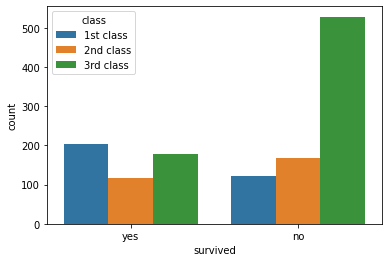

In [68]:
sns.countplot(x='survived',hue='class',data=titanic)

In [46]:
titanic = pd.get_dummies(titanic,drop_first=True)
titanic.sample(5)

,class_2nd class,class_3rd class,age_child,sex_women,survived_yes
711,0,1,0,0,0
1131,0,1,0,1,1
934,0,1,0,0,0
200,0,0,0,1,1
783,0,1,0,0,0


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('survived_yes',axis=1),titanic['survived_yes'])

In [54]:
model2 = linear_model.LogisticRegression(solver='lbfgs')
model2.fit(X_train,Y_train)

LogisticRegression()

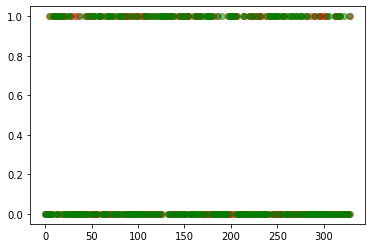

In [72]:
predictions = model2.predict(X_test)
ind = [i for i in range(len(predictions))]
plt.scatter(ind,predictions,color='r',alpha=0.5)
plt.scatter(ind,Y_test, color='g',alpha=0.5)

In [55]:
model2.score(X_test,Y_test)

0.7386018237082067